In [1]:
def readDataFrameFromCloudant(database):
    cloudantdata=spark.read.load(database, "org.apache.bahir.cloudant")

    cloudantdata.createOrReplaceTempView("raspberry")
    sqlDF = spark.sql("SELECT * from raspberry")
    sqlDF.show()
    return cloudantdata

In [2]:
hostname = ""
user = ""
pw = ""
database = "raspberry"

In [3]:
# The code was removed by DSX for sharing.

In [4]:
spark = SparkSession\
    .builder\
    .appName("Cloudant Spark SQL Example in Python using temp tables")\
    .config("cloudant.host",hostname)\
    .config("cloudant.username", user)\
    .config("cloudant.password",pw)\
    .getOrCreate()
cloudantdata=readDataFrameFromCloudant(database)

+--------------------+--------------------+--------+-----------+-------------+
|                 _id|                _rev|humidity|temperature|           ts|
+--------------------+--------------------+--------+-----------+-------------+
|0059d594586250bfa...|1-0675810d7755f06...|   26.08|      34.65|1511901642173|
|0059d594586250bfa...|1-675937bd67184d9...|   26.42|      34.58|1511901643172|
|0059d594586250bfa...|1-0a13901fe8d614a...|   26.28|       34.7|1511901646201|
|0059d594586250bfa...|1-1d25e2b0ce0aacf...|   26.15|       34.7|1511901653233|
|0059d594586250bfa...|1-68e288080a5b226...|   26.25|       34.7|1511901667316|
|0059d594586250bfa...|1-c20a99ea000096c...|   26.27|      34.45|1511901683417|
|0059d594586250bfa...|1-6913bb6bb34cf8d...|   27.22|      34.49|1511901699508|
|0059d594586250bfa...|1-1df4e3878fc8baa...|   26.48|      34.27|1511901729669|
|0059d594586250bfa...|1-030079a1e9a2008...|   27.02|      34.47|1511901754831|
|0059d594586250bfa...|1-8f03f725ebb2919...|   26.24|

In [5]:
result = spark.sql("SELECT temperature from raspberry")
rdd = result.rdd.map(lambda row : row.temperature).collect()
rdd[:15]

[34.65,
 34.58,
 34.7,
 34.7,
 34.7,
 34.45,
 34.49,
 34.27,
 34.47,
 34.54,
 34.43,
 34.59,
 34.65,
 34.86,
 34.54]

In [6]:
%matplotlib inline

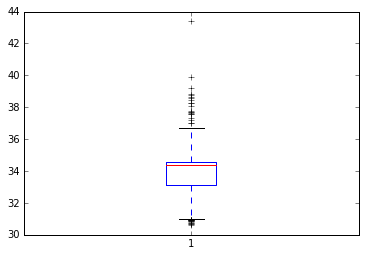

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(rdd)
plt.show()

In [8]:
result = spark.sql("SELECT temperature,ts from raspberry order by ts asc")
rdd = result.rdd.map(lambda row : (row.ts,row.temperature))
rdd_temperature = rdd.map(lambda (ts,temperature): temperature).collect()
rdd_ts = rdd.map(lambda (ts,temperature): ts).collect()
print rdd_temperature[:15]
print rdd_ts[:15]

[34.79, 34.66, 34.59, 34.68, 34.65, 34.58, 34.59, 34.66, 34.7, 34.68, 34.75, 34.47, 34.63, 34.65, 34.63]
[1511901638144, 1511901639152, 1511901640160, 1511901641167, 1511901642173, 1511901643172, 1511901644180, 1511901645188, 1511901646201, 1511901647200, 1511901648201, 1511901649210, 1511901650210, 1511901651219, 1511901652228]


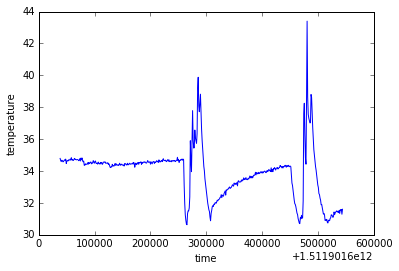

In [9]:
plt.plot(rdd_ts,rdd_temperature)
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

In [10]:
spark.sql("select min(ts),max(ts) from raspberry").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1511901638144|1511902144191|
+-------------+-------------+



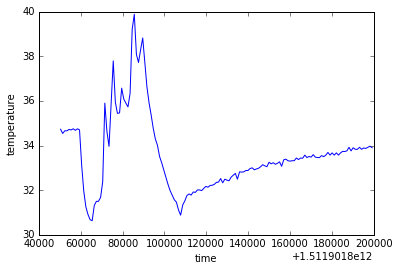

In [11]:
result = spark.sql("SELECT temperature,ts from raspberry where ts > 1511901850000 and ts <= 1511902000000 order by ts asc")
rdd = result.rdd.map(lambda row : (row.ts,row.temperature))
rdd_temperature = rdd.map(lambda (ts,temperature): temperature).collect()
rdd_ts = rdd.map(lambda (ts,temperature): ts).collect()
plt.plot(rdd_ts,rdd_temperature)
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()